## FIR Filter
This example shows how to design and use a low-pass FIR filter. The filter coefficients was created by using FDATool 

### Modules

In [117]:
from numpy import pi, fft, abs,array,convolve 
from scipy.signal import kaiserord, lfilter, firwin, freqz
import matplotlib.pyplot as plt


### Create a signal for demonstration.

In [147]:
Fs = 40000.0 #Sample rate
nsamples = 400
t = arange(nsamples) / Fs
x = 0.2*sin(2*pi*50*t) + 0.1*sin(2*pi*75*t) + sin(2*pi*1000*t) + sin(2*pi*8000*t) + 0.5*sin(2*pi*15000*t)

### Compute the FFT of original signal


In [119]:
fft_x = fft.rfft(x)
freq = fft.rfftfreq(x.size, d=1./Fs)
n = len(fft_x)

### Graphing the results



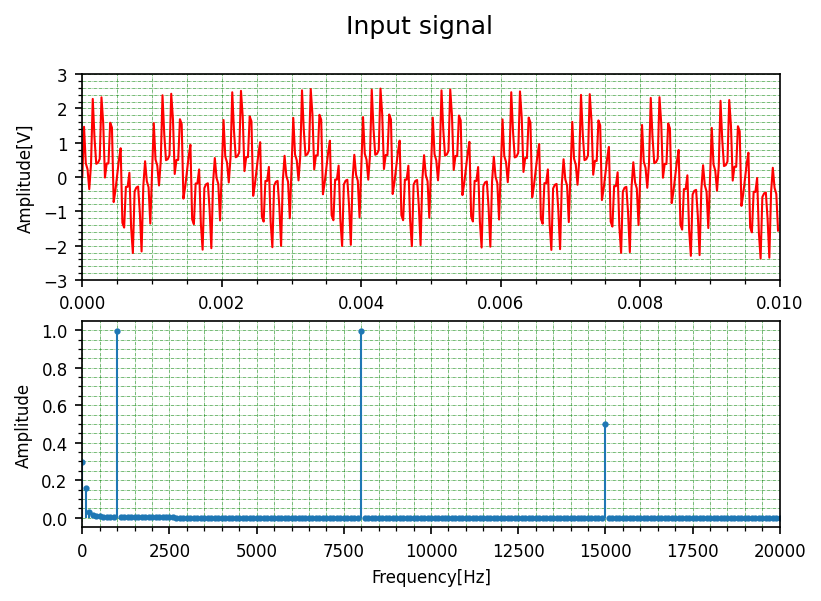

In [141]:
plt.figure(dpi=150)
plt.subplot(2, 1, 1)
plt.suptitle('Input signal')
plt.plot(t, x,c='red',linewidth=1)
plt.ylim(-3, 3)
plt.xlim(0, 0.01)
plt.ylabel('Amplitude',fontsize=8)
plt.xlabel('Time[s]',fontsize=8)
plt.grid(color='g',which='both',axis='both', ls = '-.', lw = 0.25)
plt.minorticks_on()
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

plt.subplot(2, 1, 2)
markerline, stemlines, baseline =plt.stem(freq, abs(fft_x)/n,use_line_collection=True)
plt.setp(baseline, visible=False)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, markersize = 2)
plt.ylabel('Amplitude',fontsize=8)
plt.xlabel('Frequency[Hz]',fontsize=8)
plt.xlim(0, 20000)
plt.grid(color='g',which='both',axis='both', ls = '-.', lw = 0.25)
plt.minorticks_on()
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

plt.show()

## Filtering the signal using convolution




### Filter Coefficients


In [76]:
#Window= Rectangular
#Order= 70
#Fs= 40 kHz
#Fc= 2 kHz
coeffs = array([
  -0.009131216706671,-0.008939723831482,-0.007835025221988,-0.005870369001512,
  -0.003185791611576,3.913880359251e-18, 0.003405501377892, 0.006708993144585,
   0.009576141937985,  0.01169040808732,  0.01278370338934,  0.01266460876127,
     0.0112415579272, 0.008538718547653, 0.004702835236136,-3.913880359251e-18,
   -0.00519787052415, -0.01043621155824, -0.01520916660739,  -0.0189969131419,
   -0.02130617231556, -0.02171075787646, -0.01988891017889, -0.01565431733736,
   -0.00897813999626,3.913880359251e-18,  0.01097328221765,  0.02348147600605,
    0.03693654747509,  0.05065843504506,  0.06391851694669,   0.0759876525676,
    0.08618527744187,  0.09392590402418,  0.09875953995886,    0.100402971634,
    0.09875953995886,  0.09392590402418,  0.08618527744187,   0.0759876525676,
    0.06391851694669,  0.05065843504506,  0.03693654747509,  0.02348147600605,
    0.01097328221765,3.913880359251e-18, -0.00897813999626, -0.01565431733736,
   -0.01988891017889, -0.02171075787646, -0.02130617231556,  -0.0189969131419,
   -0.01520916660739, -0.01043621155824, -0.00519787052415,-3.913880359251e-18,
   0.004702835236136, 0.008538718547653,   0.0112415579272,  0.01266460876127,
    0.01278370338934,  0.01169040808732, 0.009576141937985, 0.006708993144585,
   0.003405501377892,3.913880359251e-18,-0.003185791611576,-0.005870369001512,
  -0.007835025221988,-0.008939723831482,-0.009131216706671
])


### Plot the FIR filter coefficients

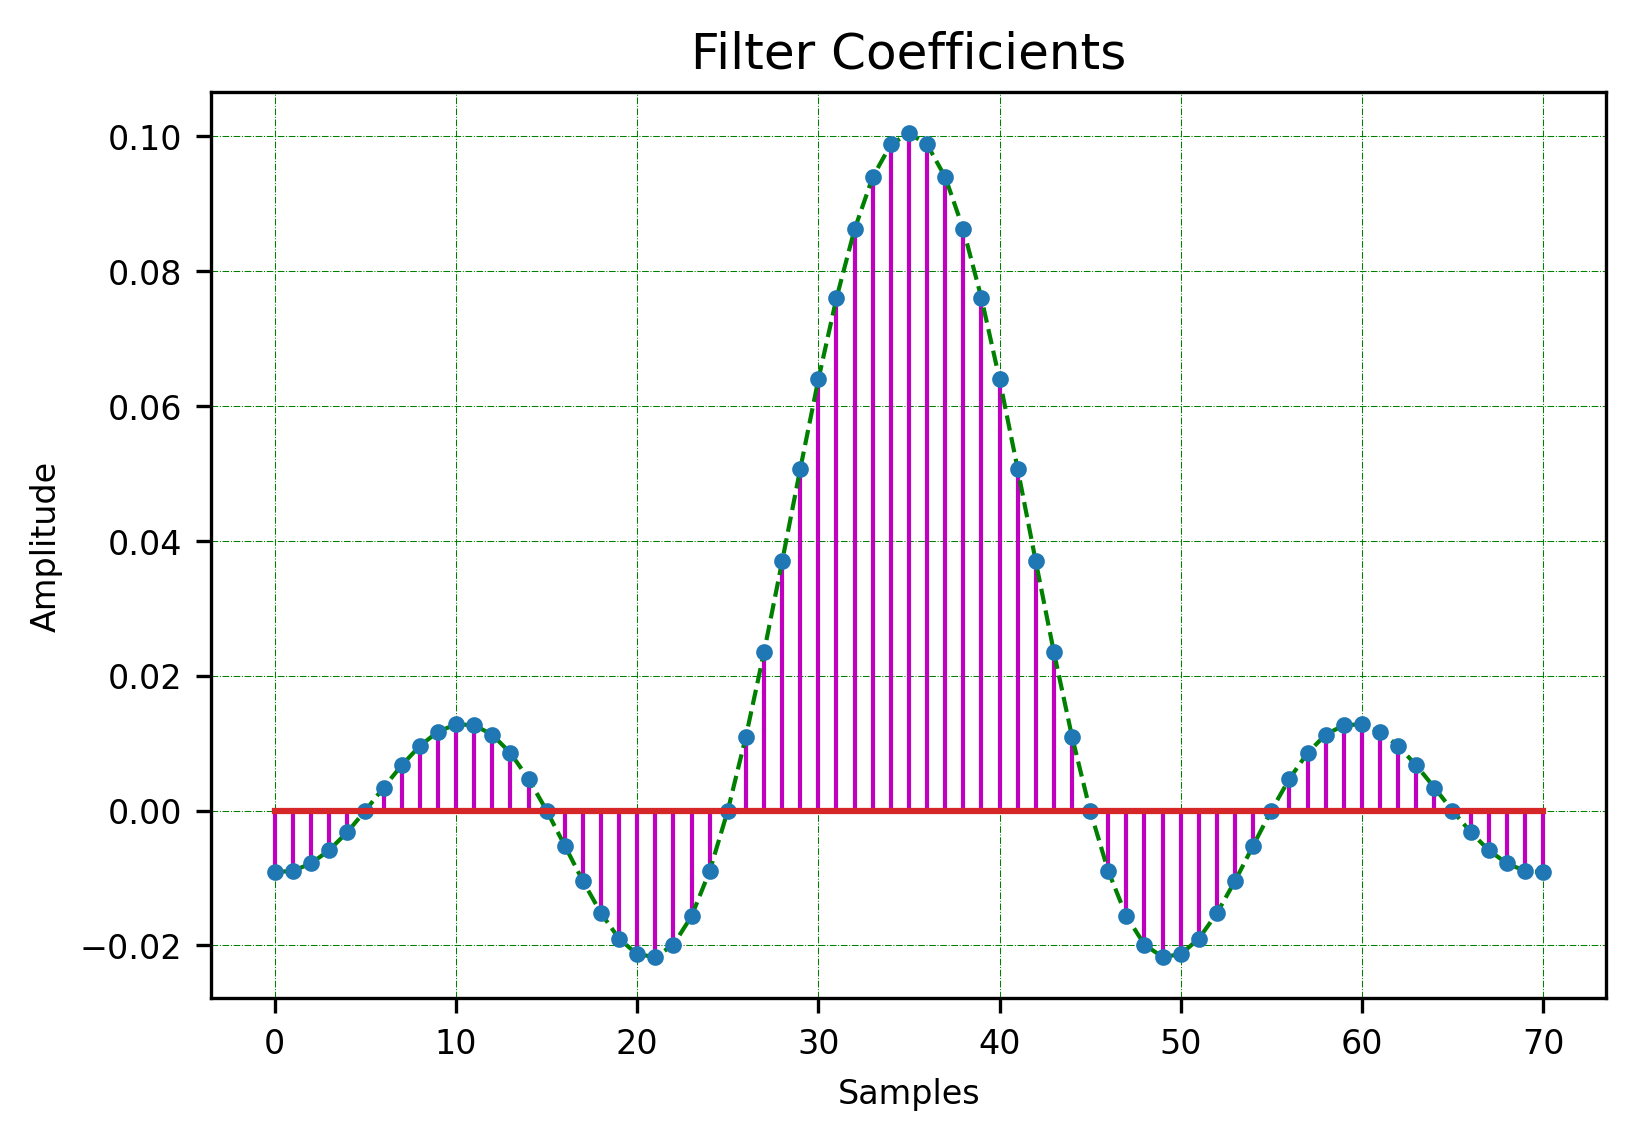

In [105]:
plt.figure(dpi=300)
plt.plot(coeffs, 'g',linestyle='dashed', linewidth=1)
markerline, stemlines, baseline =plt.stem(coeffs,use_line_collection=True)
plt.title('Filter Coefficients')
plt.grid(color='g',which='both',axis='both', ls = '-.', lw = 0.25)
plt.setp(stemlines,color='m')
plt.setp(stemlines,'linewidth', 1)
plt.setp(markerline, markersize = 3)
plt.ylabel('Amplitude',fontsize=8)
plt.xlabel('Samples',fontsize=8)
plt.show()


###Convolution

In [106]:
filtered = convolve(coeffs,x, mode='same')


### Plot the magnitude response of the filter.


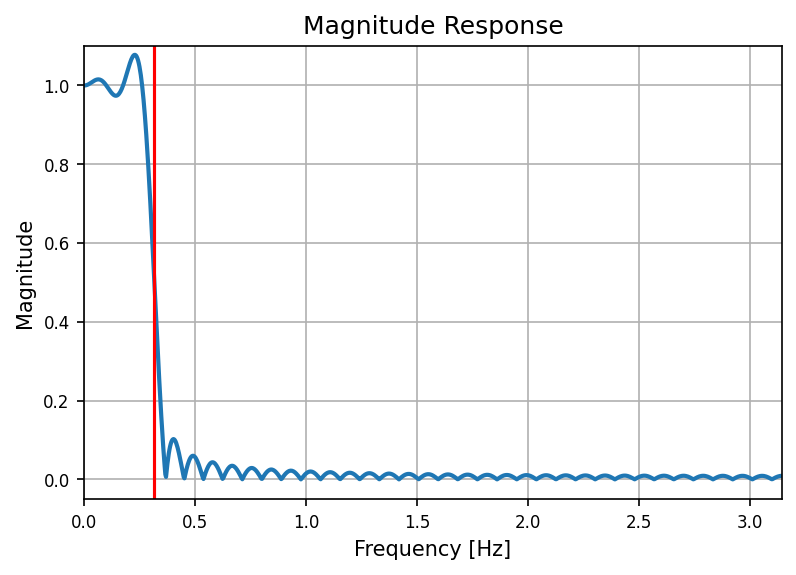

In [145]:
w, h = freqz(coeffs, worN=1024)
plt.figure(dpi=150)
plt.plot(w, abs(h), linewidth=2)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude Response')
plt.ylim(-0.05, 1.1)
plt.xlim(0, pi)
plt.axvline(2*pi*2000/40000, color='red') #Fc=2 kHz
plt.grid(True)

### Plot the original and filtered signals.

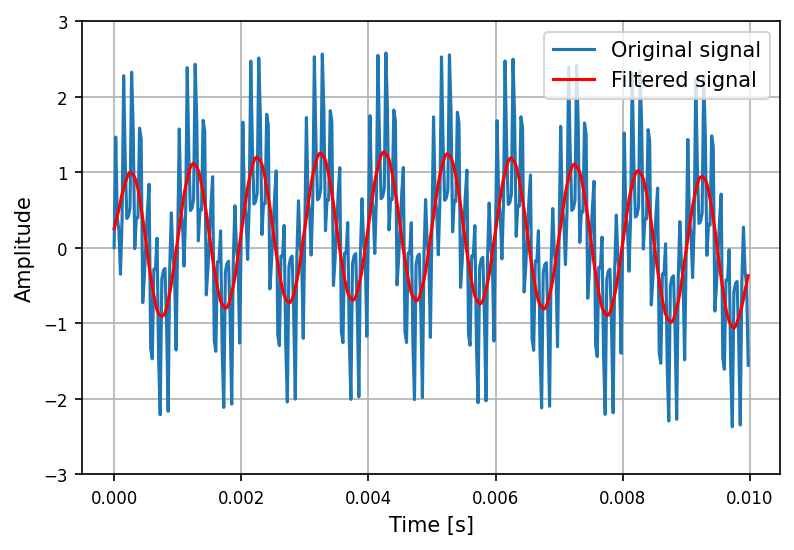

In [165]:
plt.figure(dpi=150)
plt.plot(t, x,label='Original signal')
plt.plot(t, filtered, 'r-',label='Filtered signal')
plt.ylim(-3, 3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

###Compute the FFT od filtered signal


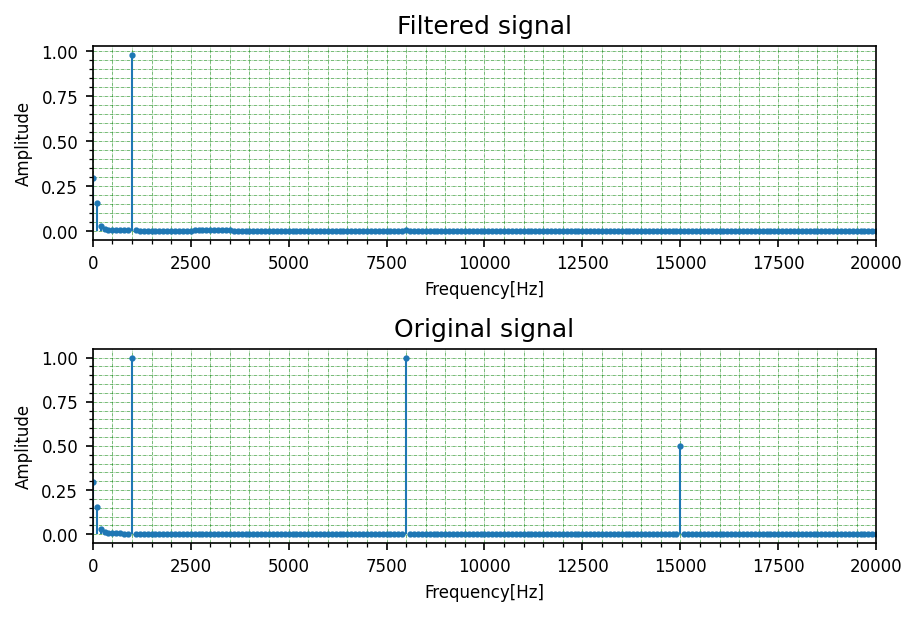

In [167]:
fft_filtered = fft.rfft(filtered)
freq = fft.rfftfreq(filtered.size, d=1./Fs)
n = len(fft_filtered)

fig, (ax1, ax2)=plt.subplots(2, 1,dpi=150,constrained_layout=True)
markerline, stemlines, baseline =ax1.stem(freq, abs(fft_filtered)/n,use_line_collection=True)
plt.setp(baseline, visible=False)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, markersize = 2)
ax1.set_ylabel('Amplitude',fontsize=8)
ax1.set_xlabel('Frequency[Hz]',fontsize=8)
ax1.set_xlim(0, 20000)
ax1.grid(color='g',which='both',axis='both', ls = '-.', lw = 0.25)
ax1.minorticks_on()
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
ax1.set_title('Filtered signal',fontsize=12)

markerline, stemlines, baseline =ax2.stem(freq, abs(fft_x)/n,use_line_collection=True)
plt.setp(baseline, visible=False)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, markersize = 2)
ax2.set_ylabel('Amplitude',fontsize=8)
ax2.set_xlabel('Frequency[Hz]',fontsize=8)
ax2.set_xlim(0, 20000)
ax2.grid(color='g',which='both',axis='both', ls = '-.', lw = 0.25)
ax2.minorticks_on()
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
ax2.set_title('Original signal',fontsize=12)


plt.show()

## Author
<a href="https://twitter.com/efectomiller"> Marcelo Gutiérrez</a>
